In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-price-dataset-of-india/House Price India.csv


# **Importing the necessary libraries for EDA and data preprocessing**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from scipy import stats

# **Converting csv file into dataframe**

In [5]:
df=pd.read_csv('/kaggle/input/house-price-dataset-of-india/House Price India.csv')

In [6]:
df=df.drop(['Date'],axis=1)

In [7]:
df

,id,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,5,2.50,3650,9050,2.0,0,4,5,10,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,4,2.50,2920,4000,1.5,0,0,5,8,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,5,2.75,2910,9480,1.5,0,0,3,8,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,4,2.50,3310,42998,2.0,0,0,3,9,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,3,2.00,2710,4500,1.5,0,0,4,8,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,6762830250,2,1.50,1556,20000,1.0,0,0,4,7,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14616,6762830339,3,2.00,1680,7000,1.5,0,0,4,7,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14617,6762830618,2,1.00,1070,6120,1.0,0,0,3,6,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14618,6762830709,4,1.00,1030,6621,1.0,0,0,4,6,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


In [8]:
df.head()

,id,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,5,2.50,3650,9050,2.0,0,4,5,10,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,4,2.50,2920,4000,1.5,0,0,5,8,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,5,2.75,2910,9480,1.5,0,0,3,8,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,4,2.50,3310,42998,2.0,0,0,3,9,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,3,2.00,2710,4500,1.5,0,0,4,8,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [9]:
df.tail()

,id,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
14615,6762830250,2,1.5,1556,20000,1.0,0,0,4,7,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14616,6762830339,3,2.0,1680,7000,1.5,0,0,4,7,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14617,6762830618,2,1.0,1070,6120,1.0,0,0,3,6,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14618,6762830709,4,1.0,1030,6621,1.0,0,0,4,6,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000
14619,6762831463,3,1.0,900,4770,1.0,0,0,3,6,...,1969,2009,122018,52.5338,-114.552,900,3480,2,55,146000


# **Checking for null and duplicated values**

In [10]:
df.isna().sum()

id                                       0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   number of bedrooms                     14620 non-null  int64  
 2   number of bathrooms                    14620 non-null  float64
 3   living area                            14620 non-null  int64  
 4   lot area                               14620 non-null  int64  
 5   number of floors                       14620 non-null  float64
 6   waterfront present                     14620 non-null  int64  
 7   number of views                        14620 non-null  int64  
 8   condition of the house                 14620 non-null  int64  
 9   grade of the house                     14620 non-null  int64  
 10  Area of the house(excluding basement)  14620 non-null  int64  
 11  Ar

In [13]:
df.describe()

,id,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,1.462000e+04,14620.000000,14620.000000,14620.000000,1.462000e+04,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,...,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,14620.000000,1.462000e+04
mean,6.762821e+09,3.379343,2.129583,2098.262996,1.509328e+04,1.502360,0.007661,0.233105,3.430506,7.682421,...,1970.926402,90.924008,122033.062244,52.792848,-114.404007,1996.702257,12753.500068,2.012244,64.950958,5.389322e+05
std,6.237575e+03,0.938719,0.769934,928.275721,3.791962e+04,0.540239,0.087193,0.766259,0.664151,1.175033,...,29.493625,416.216661,19.082418,0.137522,0.141326,691.093366,26058.414467,0.817284,8.936008,3.675324e+05
min,6.762810e+09,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,...,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,6.762815e+09,3.000000,1.750000,1440.000000,5.010750e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.750000,1.000000,57.000000,3.200000e+05
50%,6.762821e+09,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,6.762826e+09,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,6.762832e+09,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


# **Checking for outliers**

<AxesSubplot:>

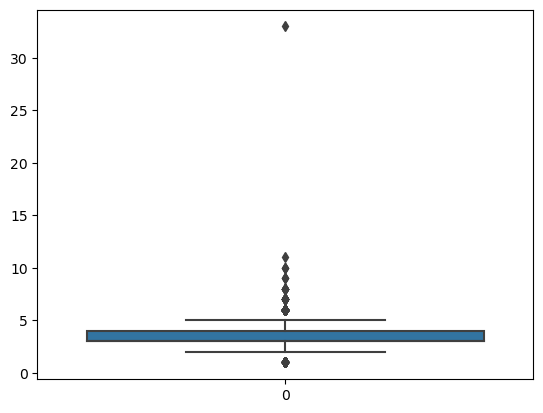

In [14]:
sns.boxplot(df['number of bedrooms'])

In [15]:
z=np.abs(stats.zscore(df['number of bedrooms']))

In [16]:
threshold=3
print(np.where(z>3),len(np.where(z>3)[0]))

(array([   76,   243,   268,   275,   624,   785,  1512,  1519,  1553,
        1706,  2814,  3109,  3114,  3322,  3532,  3600,  4207,  4486,
        4658,  4680,  6591,  6596,  6730,  6982,  6998,  7003,  7454,
        8559,  8650,  9282,  9629,  9810,  9955, 10168, 10177, 10676,
       10748, 10916, 10944, 11247, 11441, 11547, 11877, 12273, 13048,
       13444, 13825, 14220, 14481]),) 49


In [17]:
print(np.where(z<-3))

(array([], dtype=int64),)


# **There are 138 outliers in number of bedrooms as proved from the boxplot and the fact that there are observations whose z-score is beyond 3**

In [18]:
df1=df[(z< 3)]

<AxesSubplot:>

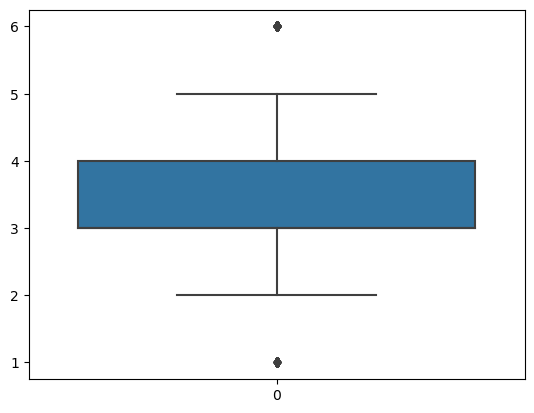

In [19]:
sns.boxplot(df1['number of bedrooms'])

In [20]:
df1

,id,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,5,2.50,3650,9050,2.0,0,4,5,10,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,4,2.50,2920,4000,1.5,0,0,5,8,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,5,2.75,2910,9480,1.5,0,0,3,8,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,4,2.50,3310,42998,2.0,0,0,3,9,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,3,2.00,2710,4500,1.5,0,0,4,8,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,6762830250,2,1.50,1556,20000,1.0,0,0,4,7,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14616,6762830339,3,2.00,1680,7000,1.5,0,0,4,7,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14617,6762830618,2,1.00,1070,6120,1.0,0,0,3,6,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14618,6762830709,4,1.00,1030,6621,1.0,0,0,4,6,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


<AxesSubplot:>

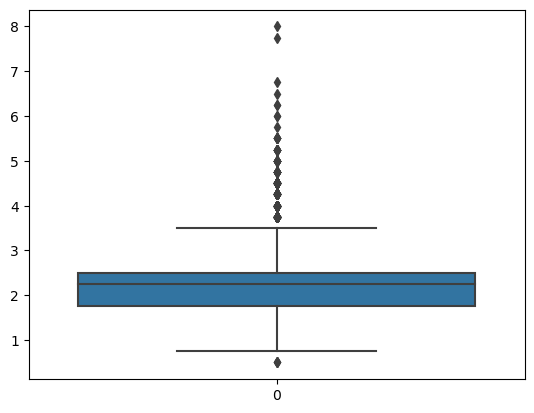

In [21]:
sns.boxplot(df1['number of bathrooms'])

In [22]:
z=np.abs(stats.zscore(df1['number of bathrooms']))

In [23]:
len(np.where(z>3)[0])

124

In [24]:
print(np.where(z<-3))

(array([], dtype=int64),)


In [25]:
df1=df1[(z< 3)]

<AxesSubplot:>

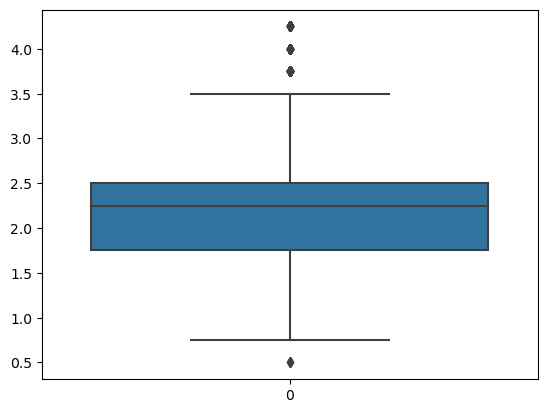

In [26]:
sns.boxplot(df1['number of bathrooms'])

In [27]:
df1

,id,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,5,2.50,3650,9050,2.0,0,4,5,10,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,4,2.50,2920,4000,1.5,0,0,5,8,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,5,2.75,2910,9480,1.5,0,0,3,8,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,4,2.50,3310,42998,2.0,0,0,3,9,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,3,2.00,2710,4500,1.5,0,0,4,8,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,6762830250,2,1.50,1556,20000,1.0,0,0,4,7,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14616,6762830339,3,2.00,1680,7000,1.5,0,0,4,7,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14617,6762830618,2,1.00,1070,6120,1.0,0,0,3,6,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14618,6762830709,4,1.00,1030,6621,1.0,0,0,4,6,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


# **There are 124 outliers in number of bathrooms as proved from the boxplot and the fact that there are observations whose z-score is beyond 3**

<AxesSubplot:>

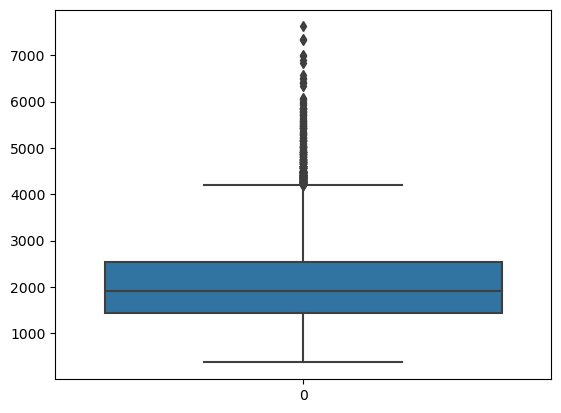

In [28]:
sns.boxplot(df1['living area'])

In [29]:
z=np.abs(stats.zscore(df1['living area']))

In [30]:
len(np.where(z>3)[0])

136

In [31]:
len(np.where(z<-3)[0])

0

In [32]:
df1=df1[(z<3)]

<AxesSubplot:>

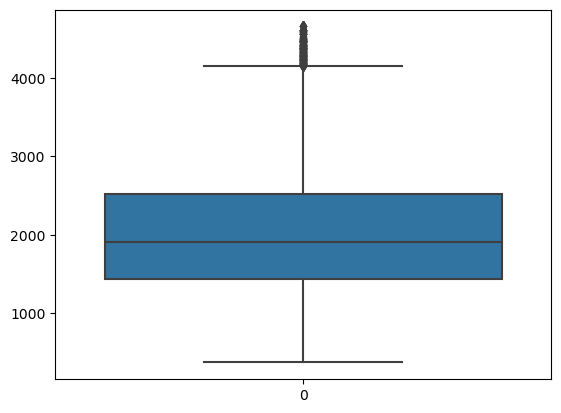

In [33]:
sns.boxplot(df1['living area'])

In [34]:
z=np.abs(stats.zscore(df1['living area']))

In [35]:
len(np.where(z>3)[0])

67

In [36]:
df1=df1[(z<3)]

<AxesSubplot:>

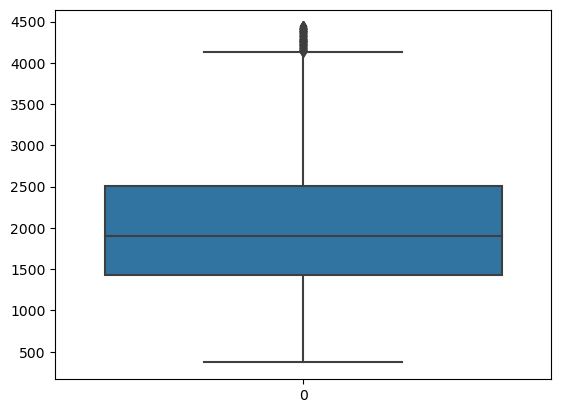

In [37]:
sns.boxplot(df1['living area'])

In [38]:
df1

,id,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,5,2.50,3650,9050,2.0,0,4,5,10,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,4,2.50,2920,4000,1.5,0,0,5,8,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,5,2.75,2910,9480,1.5,0,0,3,8,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,4,2.50,3310,42998,2.0,0,0,3,9,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,3,2.00,2710,4500,1.5,0,0,4,8,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,6762830250,2,1.50,1556,20000,1.0,0,0,4,7,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14616,6762830339,3,2.00,1680,7000,1.5,0,0,4,7,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14617,6762830618,2,1.00,1070,6120,1.0,0,0,3,6,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14618,6762830709,4,1.00,1030,6621,1.0,0,0,4,6,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


# **There are 205 outliers in living as proved from the boxplot and the fact that there are observations whose z-score is beyond 3**

<AxesSubplot:>

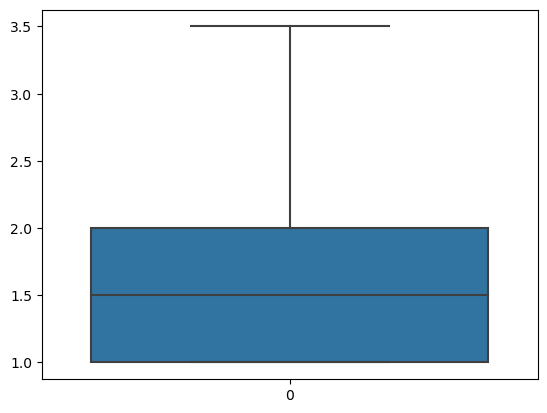

In [39]:
sns.boxplot(df1['number of floors'])

In [40]:
z=np.abs(stats.zscore(df1['number of floors']))

In [41]:
len(np.where(z>3)[0])

3

In [42]:
df1=df1[(z<3)]

<AxesSubplot:>

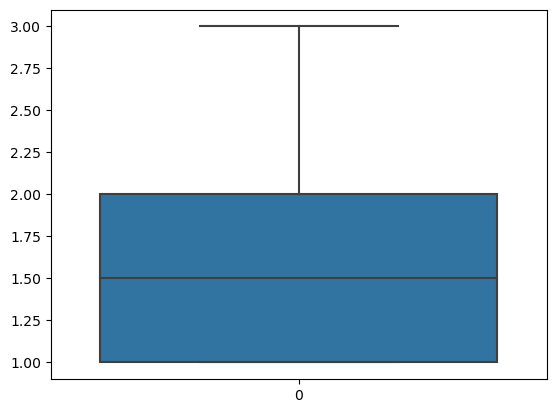

In [43]:
sns.boxplot(df1['number of floors'])

# **There are 3 outliers in number of floors**

<AxesSubplot:>

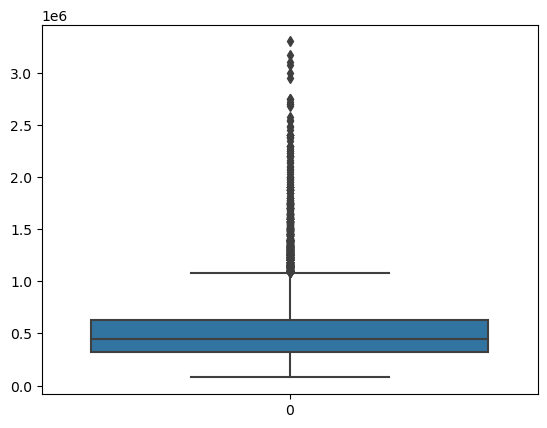

In [44]:
sns.boxplot(df1['Price'])

In [45]:
z=np.abs(stats.zscore(df1['Price']))

In [46]:
len(np.where(z>3)[0])

259

In [47]:
df1=df1[(z<3)]

In [48]:
df1

,id,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
2,6762810998,5,2.75,2910,9480,1.5,0,0,3,8,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,4,2.50,3310,42998,2.0,0,0,3,9,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,3,2.00,2710,4500,1.5,0,0,4,8,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
5,6762813105,3,2.50,2600,4750,1.0,0,0,4,9,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000
6,6762813157,5,3.25,3660,11995,2.0,0,2,3,10,...,2006,0,122008,52.7637,-114.050,3320,11241,3,72,785000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,6762830250,2,1.50,1556,20000,1.0,0,0,4,7,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14616,6762830339,3,2.00,1680,7000,1.5,0,0,4,7,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14617,6762830618,2,1.00,1070,6120,1.0,0,0,3,6,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14618,6762830709,4,1.00,1030,6621,1.0,0,0,4,6,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


In [49]:
df1=df1.drop(['Renovation Year'],axis=1)

In [50]:
df1

,id,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,...,Area of the basement,Built Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
2,6762810998,5,2.75,2910,9480,1.5,0,0,3,8,...,0,1939,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,4,2.50,3310,42998,2.0,0,0,3,9,...,0,2001,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,3,2.00,2710,4500,1.5,0,0,4,8,...,830,1929,122006,52.9047,-114.485,2060,4500,1,51,805000
5,6762813105,3,2.50,2600,4750,1.0,0,0,4,9,...,900,1951,122007,52.9133,-114.590,2380,4750,1,67,790000
6,6762813157,5,3.25,3660,11995,2.0,0,2,3,10,...,0,2006,122008,52.7637,-114.050,3320,11241,3,72,785000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,6762830250,2,1.50,1556,20000,1.0,0,0,4,7,...,0,1957,122066,52.6191,-114.472,2250,17286,3,76,221700
14616,6762830339,3,2.00,1680,7000,1.5,0,0,4,7,...,0,1968,122072,52.5075,-114.393,1540,7480,3,59,219200
14617,6762830618,2,1.00,1070,6120,1.0,0,0,3,6,...,0,1962,122056,52.7289,-114.507,1130,6120,2,64,209000
14618,6762830709,4,1.00,1030,6621,1.0,0,0,4,6,...,0,1955,122042,52.7157,-114.411,1420,6631,3,54,205000


# **The column Renovation year have been removed. This is because most of the Renovation Year are 0 and  proves to be of no use to the model**

<AxesSubplot:xlabel='number of bedrooms', ylabel='Price'>

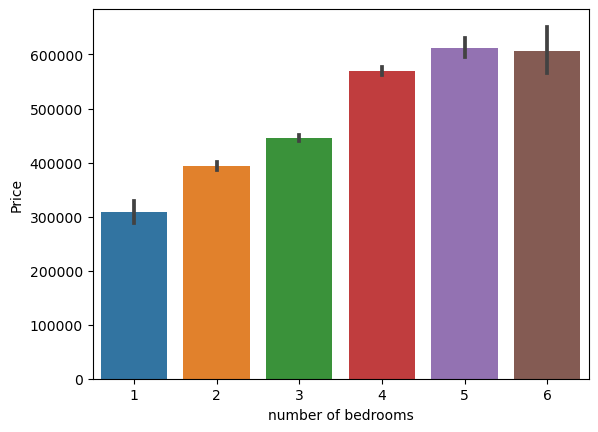

In [51]:
sns.barplot(data=df1,x='number of bedrooms',y='Price')

# **Clear indication of Price increasing with number of bedrooms**

<AxesSubplot:xlabel='number of bathrooms', ylabel='Price'>

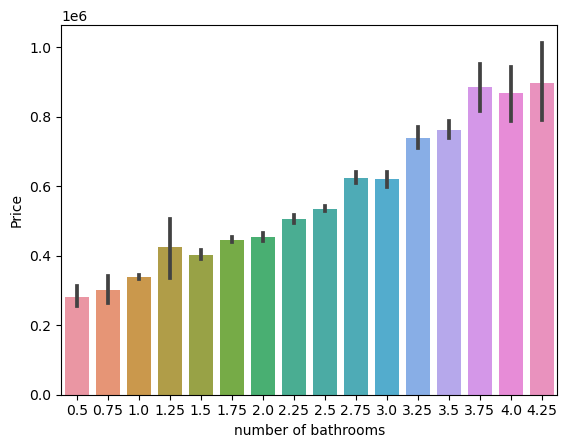

In [52]:
sns.barplot(data=df1,x='number of bathrooms',y='Price')

# **Clear indication of Price increasing with number of bathrooms**

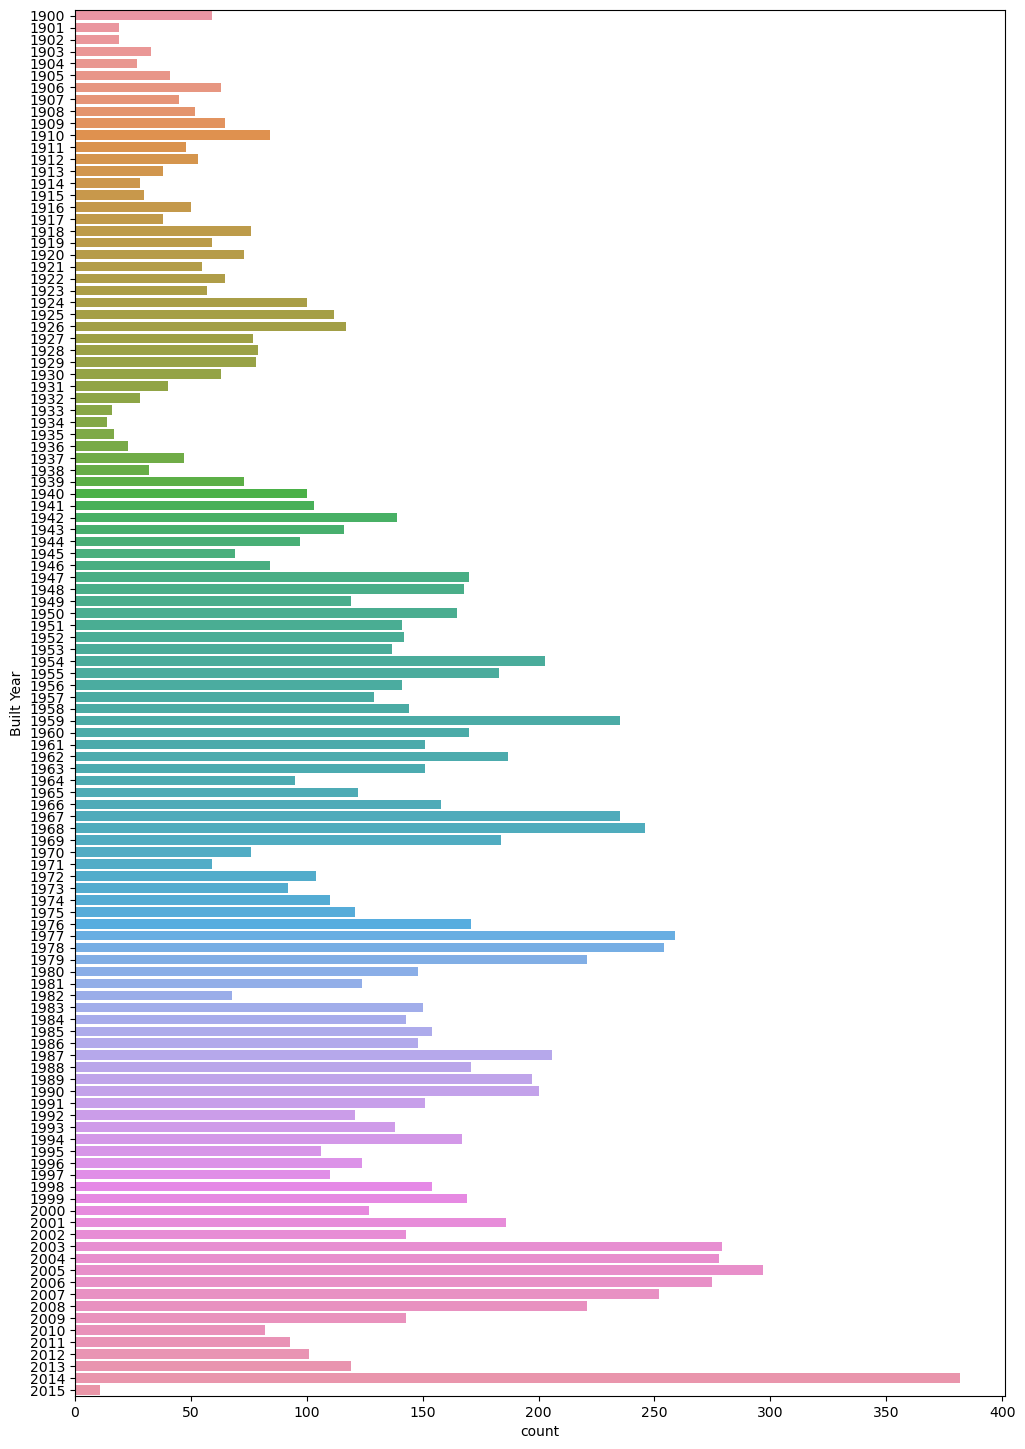

In [53]:
plt.figure(figsize=(12,18))
sns.countplot(data=df1,y='Built Year')
plt.show()

# **Most of the houses were listed for sale in 2017**

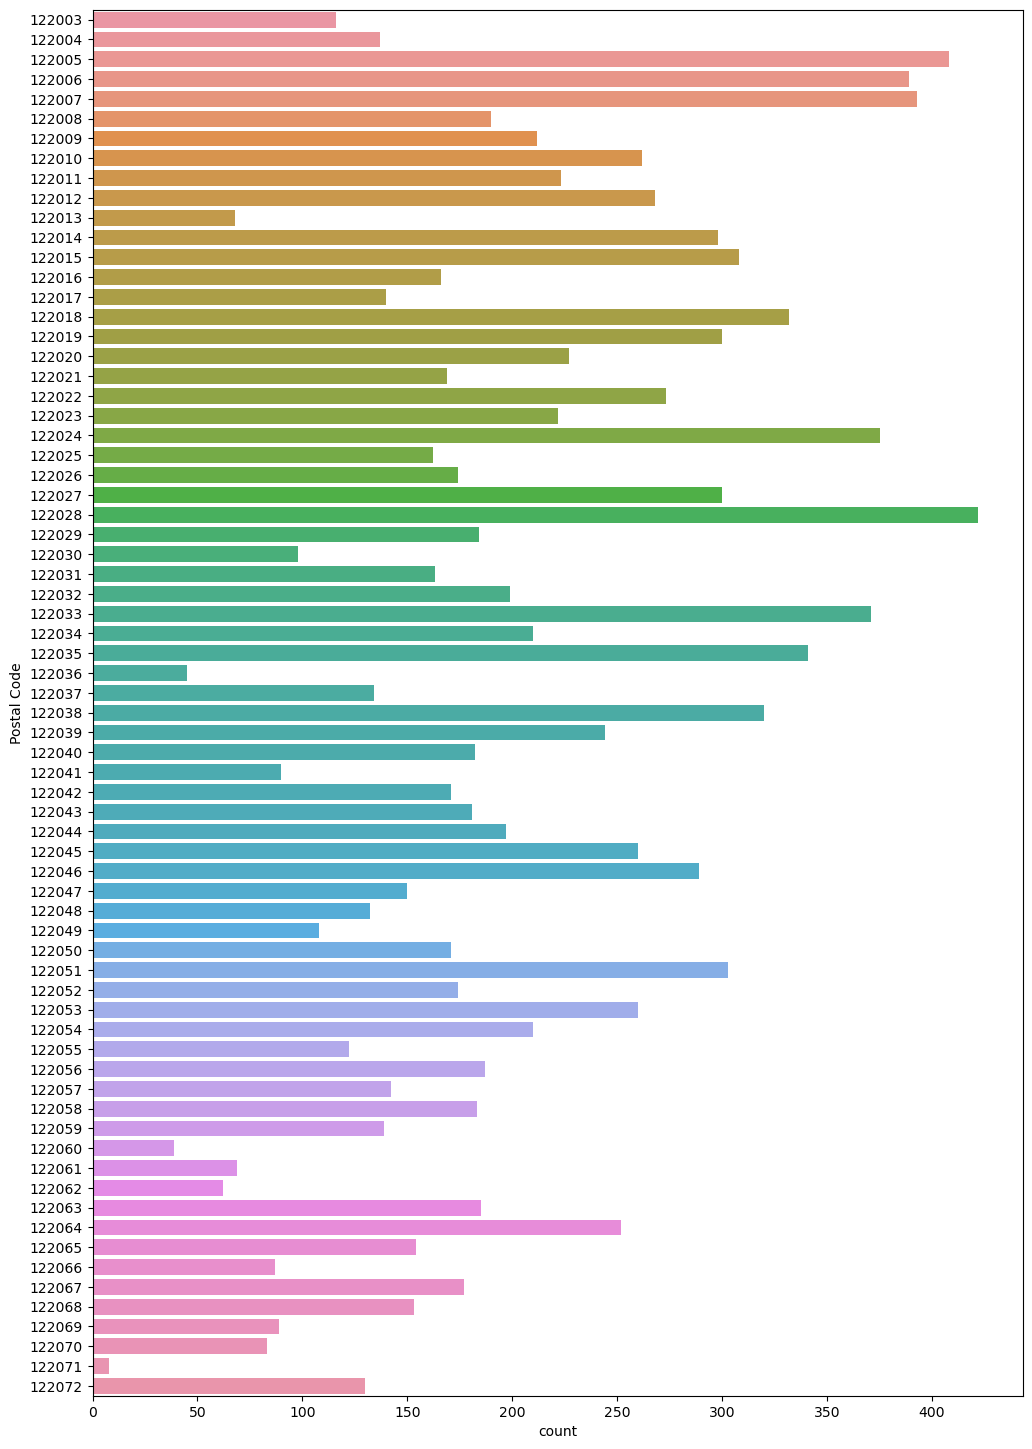

In [54]:
plt.figure(figsize=(12,18))
sns.countplot(data=df1,y='Postal Code')
plt.show()

# **Most of the houses listed for sale are from the Pincode 122028**

In [55]:
df1[df1['Built Year']==2014]['Lattitude'].mean()

52.77583376963351

In [56]:
df1[df1['Built Year']==2014]['Longitude'].mean()

-114.38898952879582

In [57]:
m = folium.Map(location = [52.77, -114.4], tiles ='OpenStreetMap',      
    zoom_start=8)

for index, location_info in df1[(df1['Built Year']==2014) & (df1['Distance from the airport']<=70)].iterrows():
    folium.Marker([location_info["Lattitude"], location_info["Longitude"]], popup=location_info["Price"],icon=folium.Icon(color='red')).add_to(m)
m

In [58]:
df1[df1['Built Year']>=2014]['Lattitude'].mean()

52.77850305343512

In [59]:
df1[df1['Built Year']>=2014]['Longitude'].mean()

-114.39186768447837

In [60]:
m = folium.Map(location = [52.77, -114.4], tiles ='OpenStreetMap',      
    zoom_start=8)

for index, location_info in df1[(df1['Built Year']>=2014) & (df1['Distance from the airport']<=70)].iterrows():
    folium.Marker([location_info["Lattitude"], location_info["Longitude"]], popup=location_info["Price"],icon=folium.Icon(color='red')).add_to(m)
m

# **The houses listed for sale in this dataset are located in Alberta, Canada**

In [61]:
df1=df1.drop(['id'],axis=1)

In [62]:
df1=df1.drop(['Postal Code'],axis=1)

# **Columns ID and Postal Code have been dropped from df as an increase or decrease in Postal Code shall not directly impact the Price of the property**

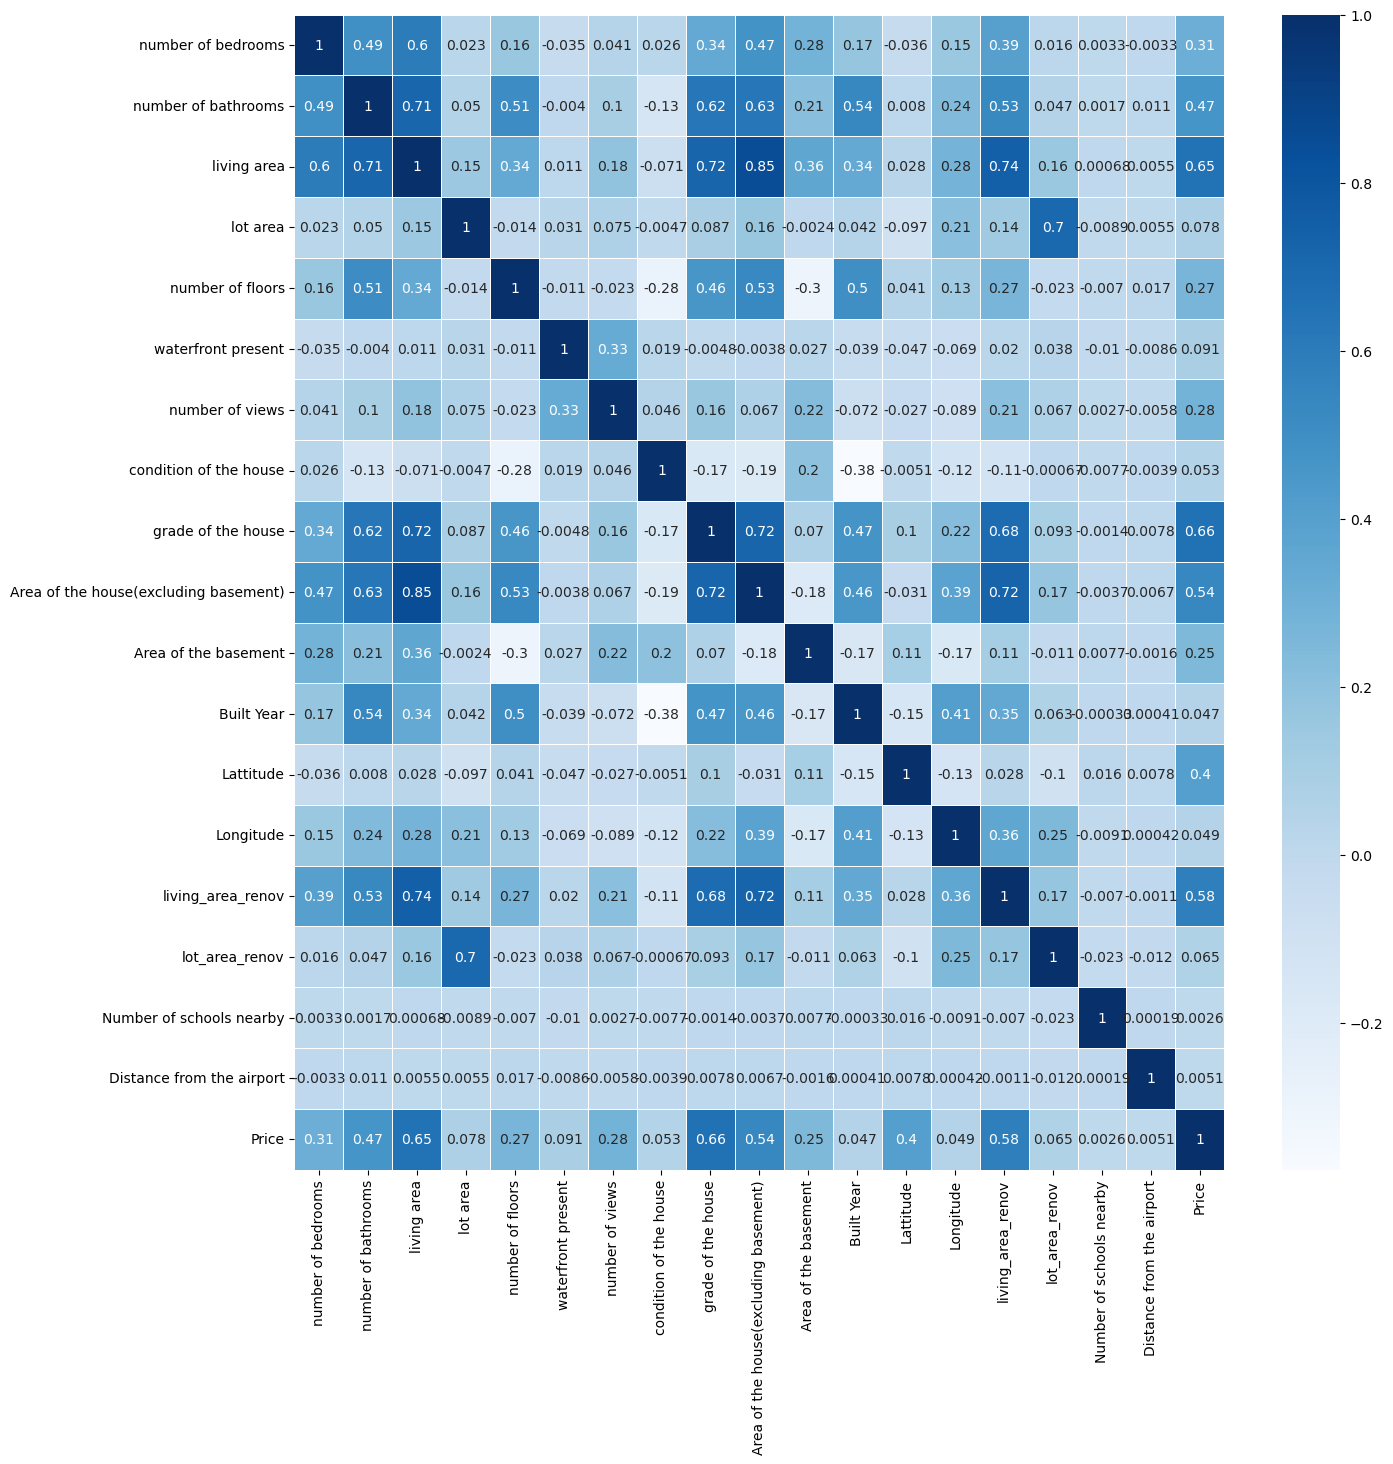

In [63]:
plt.figure(figsize=(15,15))
sns.heatmap(df1.corr(),linewidths=0.5,annot=True,cmap='Blues')
plt.show()

# **Columns like 'lot area','condition of the house','Built Year','lot_area_renov','Number of schools nearby','Distance from the airport','Longitude' contribute minimal to Price which is the Target variable. Hence it is removed before training**

In [64]:
df1=df1.drop(['lot area','condition of the house','Built Year','lot_area_renov','Number of schools nearby','Distance from the airport','Longitude'],axis=1)

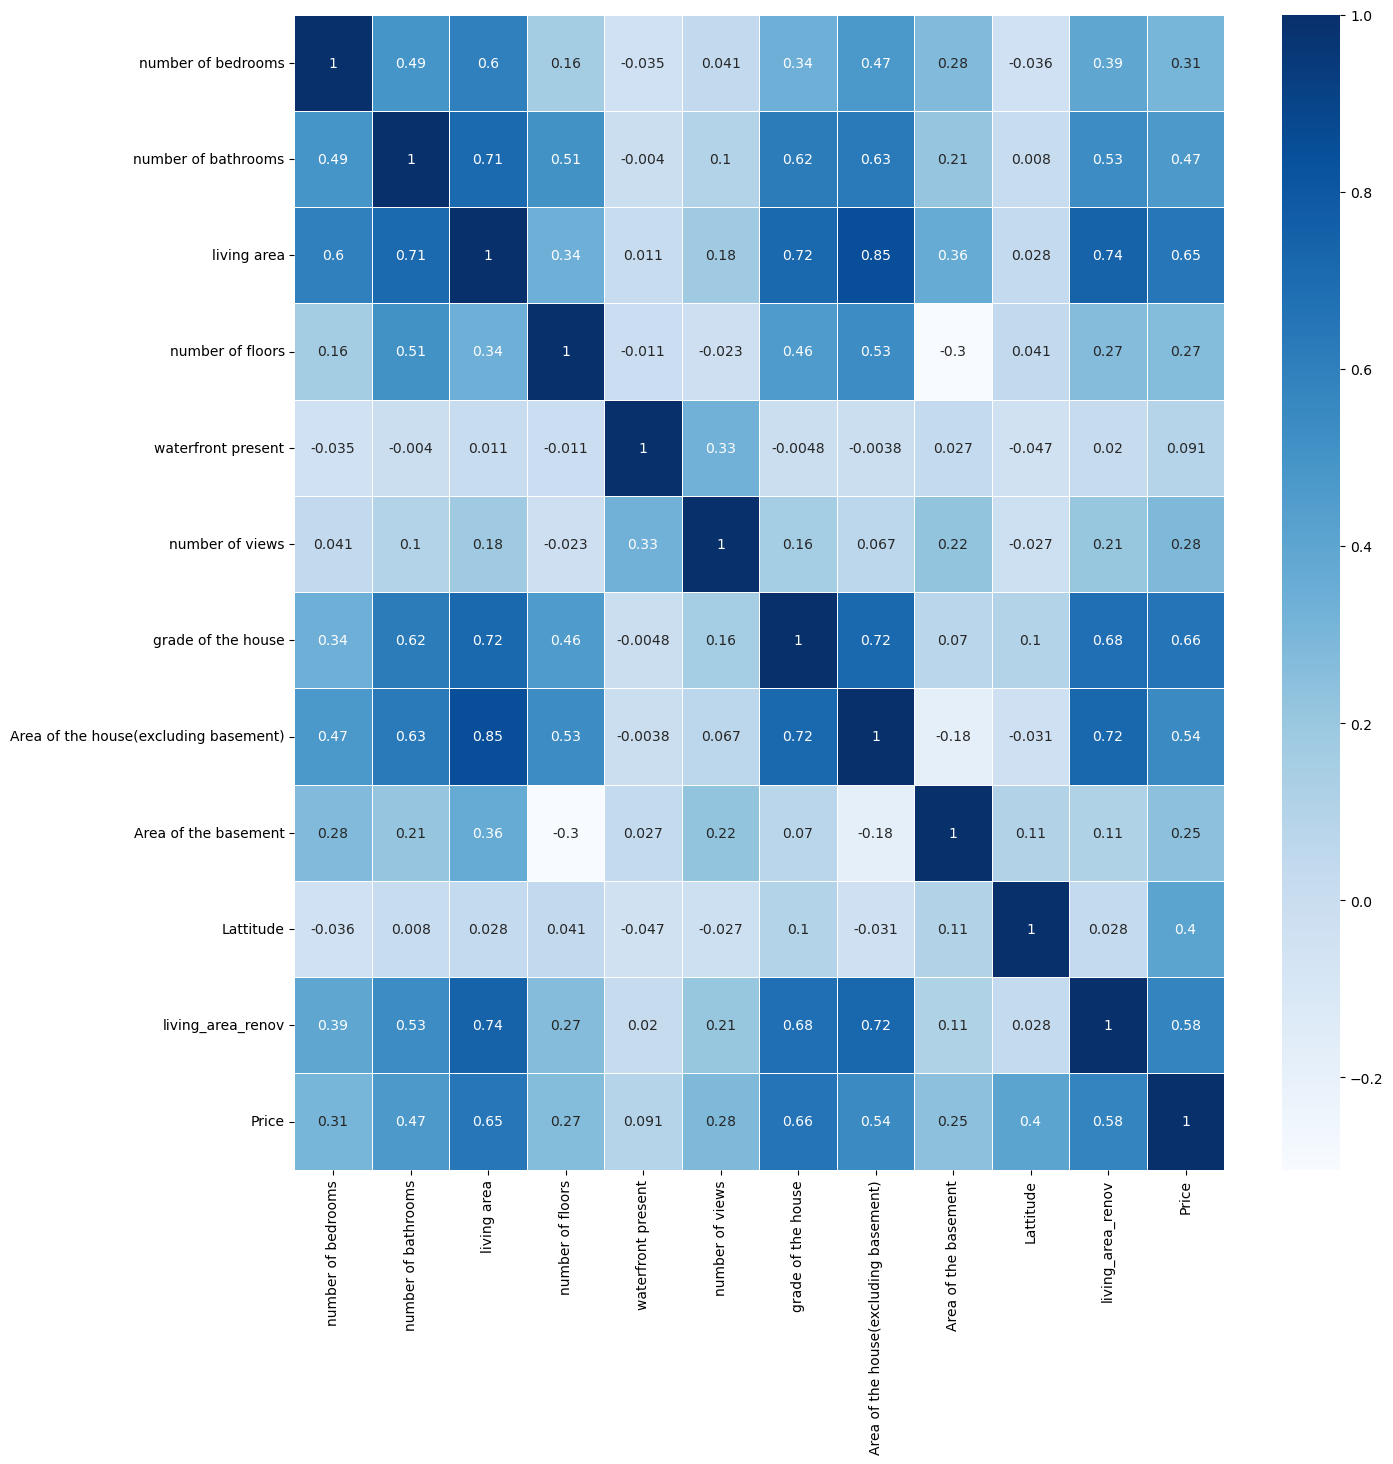

In [65]:
plt.figure(figsize=(15,15))
sns.heatmap(df1.corr(),linewidths=0.5,annot=True,cmap='Blues')
plt.show()

 # **Training of Model, Splitting of Dataset into Train and Test Set**

In [66]:
from sklearn.model_selection import train_test_split 

In [67]:
X=df1.drop(['Price'],axis =1)

In [68]:
X.shape

(13982, 11)

In [69]:
y=df1['Price']

In [70]:
y.shape

(13982,)

In [71]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=11)

In [72]:
X_train.shape

(11185, 11)

In [73]:
X_test.shape

(2797, 11)

In [109]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import ElasticNet, Lasso,LinearRegression,RidgeCV
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.svm import SVR

In [75]:
pipelines = {
    'en':make_pipeline(StandardScaler(), ElasticNet()),
    'lasso':make_pipeline(StandardScaler(), Lasso()),
    'Rcv':make_pipeline(StandardScaler(), RidgeCV()),
    'CatB':make_pipeline(StandardScaler(), CatBoostRegressor(eval_metric='RMSE',verbose=1000)),
    'lr':make_pipeline(StandardScaler(), LinearRegression()),
    'rf':make_pipeline(StandardScaler(), RandomForestRegressor()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingRegressor()),
    'dtc':make_pipeline(StandardScaler(),DecisionTreeRegressor()),
    'xg':make_pipeline(StandardScaler(),XGBRegressor())
}

In [76]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.781e+12, tolerance: 5.929e+10
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Learning rate set to 0.05996
0:	learn: 221490.1496581	total: 61.8ms	remaining: 1m 1s
999:	learn: 77595.2298921	total: 2.35s	remaining: 0us


In [166]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
maes=[]
al=[]
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    al.append(algo)
    maes.append(mean_squared_error(y_test,yhat)**0.5)
    print(algo,'MEAN ABSOLUTE ERROR', mean_absolute_error(y_test,yhat))
    print(algo,'ROOT MEAN SQUARED ERROR',mean_squared_error(y_test,yhat)**0.5)

en MEAN ABSOLUTE ERROR 104444.32355671145
en ROOT MEAN SQUARED ERROR 140011.53917862213
lasso MEAN ABSOLUTE ERROR 97479.23118789196
lasso ROOT MEAN SQUARED ERROR 132916.1566456281
Rcv MEAN ABSOLUTE ERROR 97481.91673717603
Rcv ROOT MEAN SQUARED ERROR 132918.333682342
CatB MEAN ABSOLUTE ERROR 66637.30790160663
CatB ROOT MEAN SQUARED ERROR 97508.34029611414
lr MEAN ABSOLUTE ERROR 97574.48622571728
lr ROOT MEAN SQUARED ERROR 132952.7515959945
rf MEAN ABSOLUTE ERROR 69677.62043400243
rf ROOT MEAN SQUARED ERROR 102932.2110750017
gb MEAN ABSOLUTE ERROR 69874.84067217445
gb ROOT MEAN SQUARED ERROR 101056.41447857217
dtc MEAN ABSOLUTE ERROR 97074.14533428673
dtc ROOT MEAN SQUARED ERROR 144341.77256110197
xg MEAN ABSOLUTE ERROR 69035.05210660976
xg ROOT MEAN SQUARED ERROR 100694.41040458805


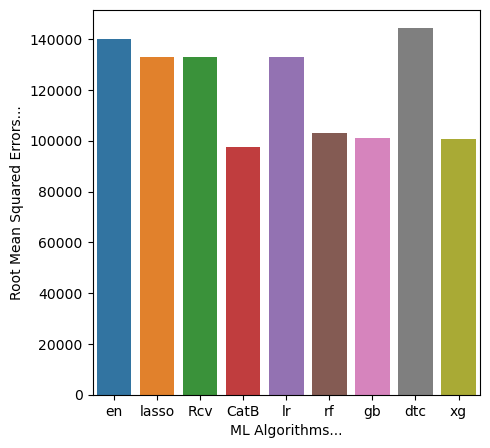

In [167]:
plt.figure(figsize=(5,5))
plt.xlabel('ML Algorithms...')
plt.ylabel('Root Mean Squared Errors...')
ax=sns.barplot(x=al,y=maes)
plt.show()

In [169]:
CatB = CatBoostRegressor(verbose=1000,eval_metric='RMSE')
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
xg = XGBRegressor()
lr=LinearRegression()

stregr = StackingRegressor(estimators=[('catb',CatB),('xg', xg),('gb',gb)],
                           final_estimator=lr)

pipeline = make_pipeline(
    StandardScaler(),
    stregr
)
pipeline.fit(X_train, y_train)

# Generate predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Root Mean Squared Error: %.4f" % mean_squared_error(y_test,y_pred)**0.5)


Learning rate set to 0.05996
0:	learn: 221490.1496581	total: 2.49ms	remaining: 2.49s
999:	learn: 77595.2298921	total: 2.32s	remaining: 0us
Learning rate set to 0.057883
0:	learn: 222091.4863333	total: 2.32ms	remaining: 2.32s
999:	learn: 76337.1933964	total: 2.08s	remaining: 0us
Learning rate set to 0.057883
0:	learn: 222546.8538661	total: 2.27ms	remaining: 2.27s
999:	learn: 75466.5961681	total: 2.09s	remaining: 0us
Learning rate set to 0.057883
0:	learn: 223455.5230951	total: 2.3ms	remaining: 2.3s
999:	learn: 75656.3661258	total: 2.12s	remaining: 0us
Learning rate set to 0.057883
0:	learn: 221606.9467960	total: 2.23ms	remaining: 2.22s
999:	learn: 75195.9699196	total: 2.08s	remaining: 0us
Learning rate set to 0.057883
0:	learn: 219316.0911020	total: 2.24ms	remaining: 2.24s
999:	learn: 74522.7989238	total: 2.1s	remaining: 0us
Root Mean Squared Error: 96981.7347


In [170]:
mean_squared_error(y_test,y_pred)**0.5

96981.7347242302

In [171]:
al.append('stacked model')
maes.append(mean_squared_error(y_test,y_pred)**0.5)

In [173]:
for i in range(10):
    print("The RMSE of",al[i],'is',maes[i])

The RMSE of en is 140011.53917862213
The RMSE of lasso is 132916.1566456281
The RMSE of Rcv is 132918.333682342
The RMSE of CatB is 97508.34029611414
The RMSE of lr is 132952.7515959945
The RMSE of rf is 102932.2110750017
The RMSE of gb is 101056.41447857217
The RMSE of dtc is 144341.77256110197
The RMSE of xg is 100694.41040458805
The RMSE of stacked model is 96981.7347242302


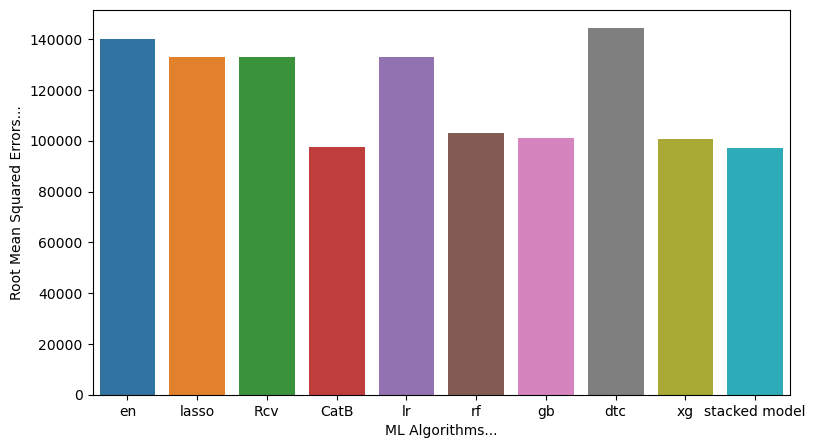

In [172]:
plt.figure(figsize=(9,5))
plt.xlabel('ML Algorithms...')
plt.ylabel('Root Mean Squared Errors...')
ax=sns.barplot(x=al,y=maes)
plt.show()

# **The Stacked Model has an edge over the rest of the models due to lower RMSE**

**Do upvote the notebook if you find the work worthy!**